In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
import pickle

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
# Check missing values of data

diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Statistical measures of data

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()         # Where 0--> Non-diabetes patients and 1--> Diabetes patients

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


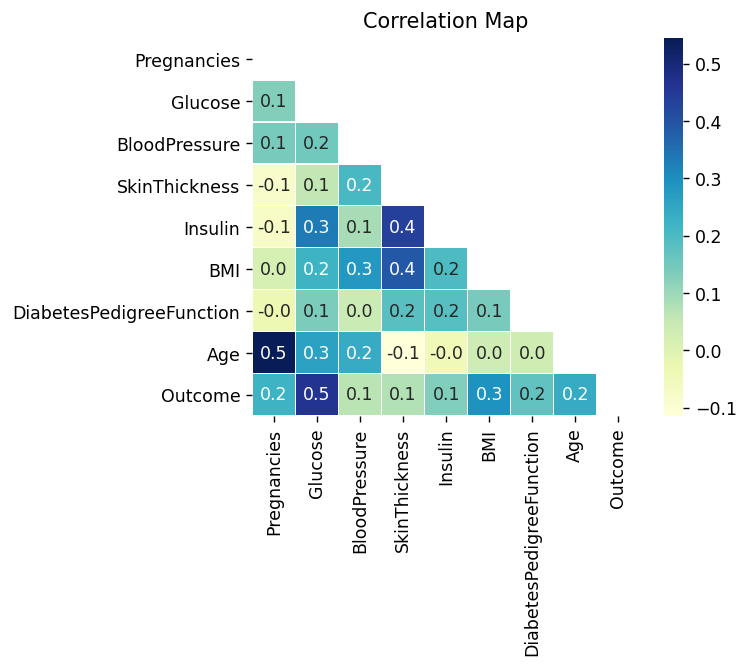

In [11]:
#correlation map without any preprocessing

plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(diabetes_dataset.corr())
sns.heatmap(diabetes_dataset.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


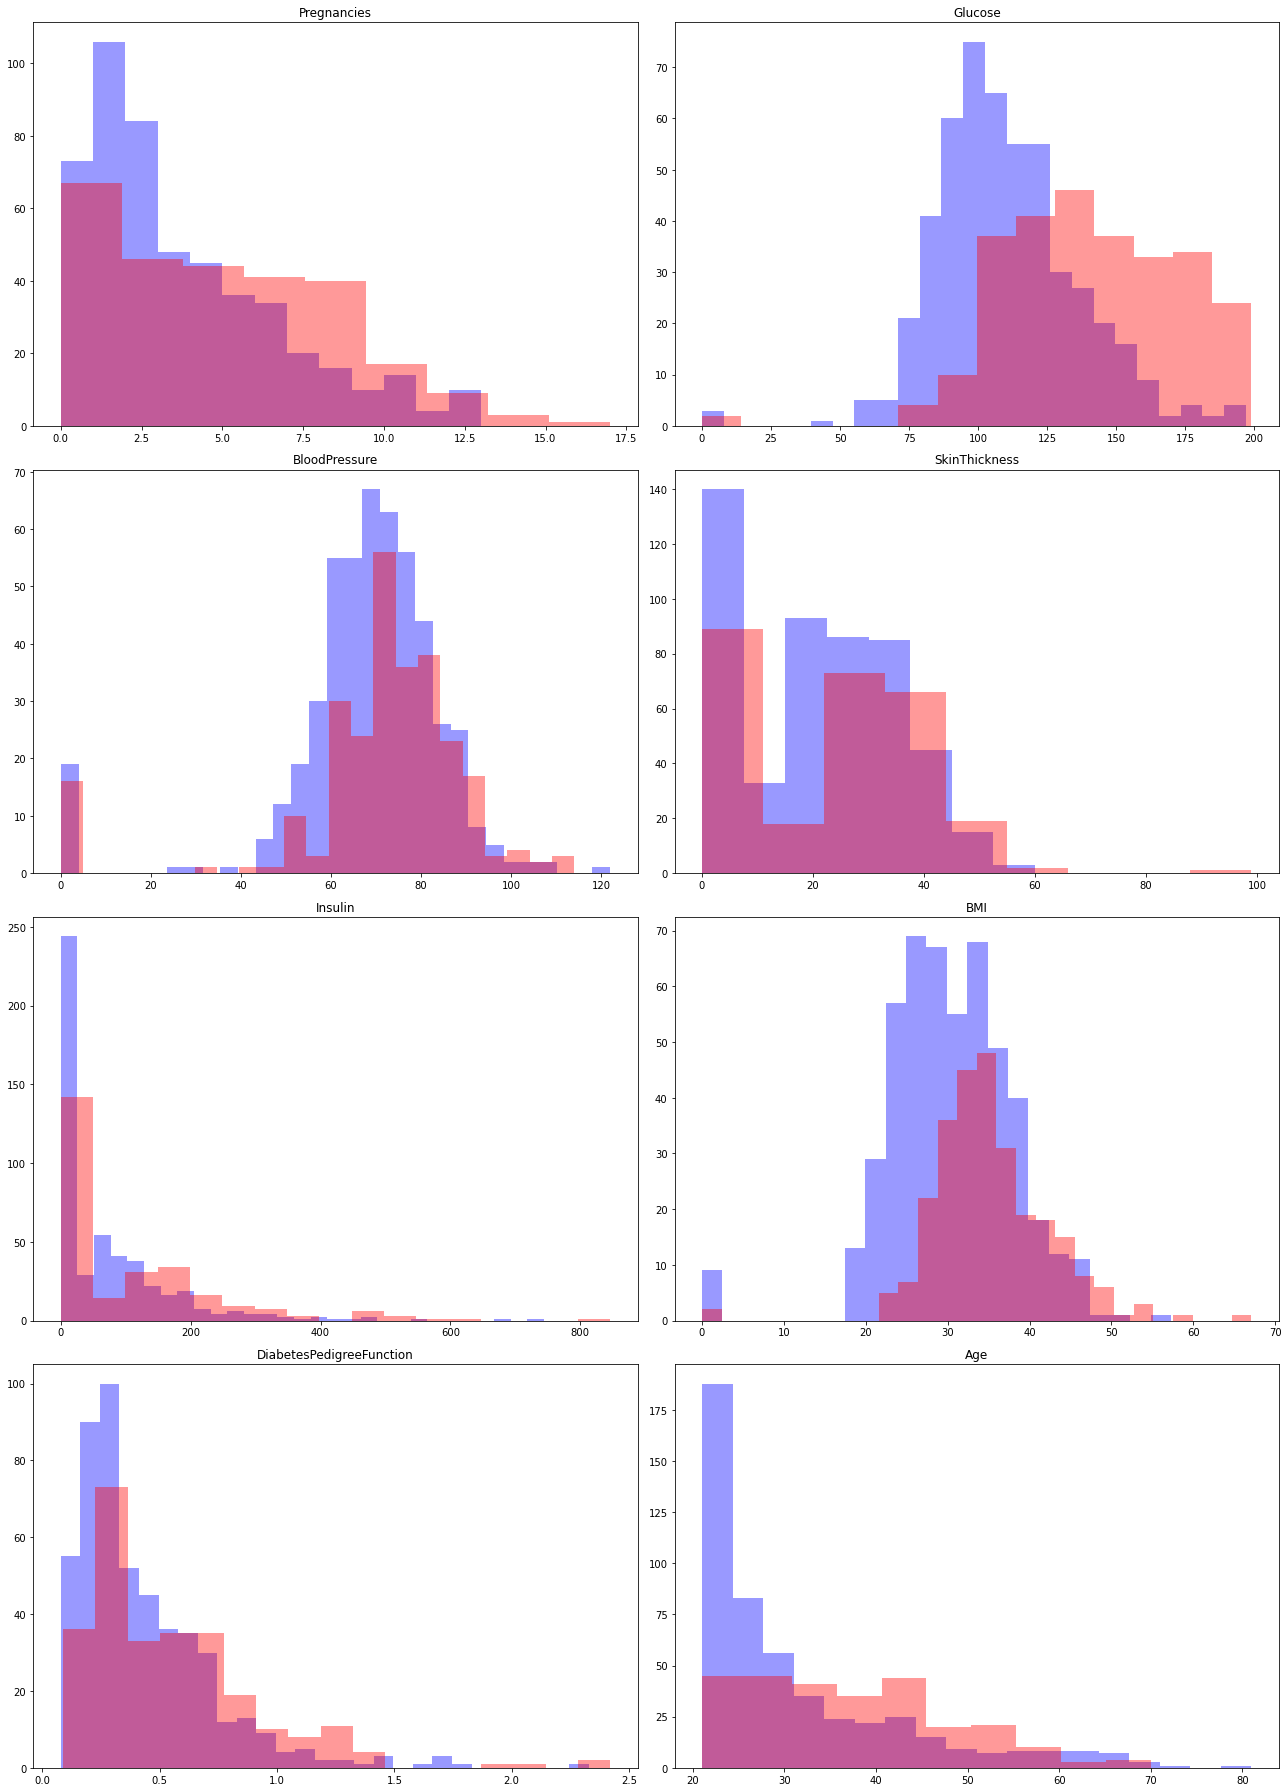

In [12]:
column_list = list(diabetes_dataset.columns)

fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(18, 25))

target_0 = diabetes_dataset.loc[diabetes_dataset['Outcome'] == 0]
target_1 = diabetes_dataset.loc[diabetes_dataset['Outcome'] == 1]

for i, subplot in zip(range(8), ax.flatten()):
    
    sns.distplot(target_0[[column_list[i]]], hist=True, color = 'blue', ax=subplot, norm_hist = False, kde = False)
    sns.distplot(target_1[[column_list[i]]], hist=True, color = 'red', ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()

plt.show()

In [13]:
# seperating the data and labels

x = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [14]:
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# #SVM

In [15]:
# Data standardization

scaler = StandardScaler()

In [16]:
scaler.fit(x)

StandardScaler()

In [17]:
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
# Splitting training and testing data
x = standardized_data
y = diabetes_dataset['Outcome']

In [19]:
#print(x)
#print(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [21]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [22]:
# Training the model

classifier = svm.SVC(kernel='linear')

In [23]:
#Training the svm classifier

classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [24]:
# Accuracy score on training data

x_train_accuracy = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_accuracy, y_train)

print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.7866449511400652


In [25]:
# Accuracy score on test data

x_test_accuracy = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_accuracy, y_test)

print('Accuracy score on test data :', testing_data_accuracy)

Accuracy score on test data : 0.7727272727272727


# # Random Forest

In [26]:
classifier = RandomForestClassifier(n_estimators=30)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [27]:
# Accuracy on test data

x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print('Accuracy score of test data :', test_data_accuracy)

Accuracy score of test data : 0.7402597402597403


# # KNN

In [28]:
kn_classifier = KNeighborsClassifier(n_neighbors =5,metric = 'minkowski',p = 2)
kn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
kn_y_pred = kn_classifier.predict(x_test)

cm_kn = confusion_matrix(y_test, kn_y_pred)
print(cm_kn)

[[87 13]
 [30 24]]


In [30]:
# Accuracy score on training data

x_train_accuracy = kn_classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_accuracy, y_train)

print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.8289902280130294


In [31]:
# Accuracy score on test data

x_test_accuracy = kn_classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_accuracy, y_test)

print('Accuracy score on test data :', testing_data_accuracy)

Accuracy score on test data : 0.7207792207792207


# Naive Bayes 

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [34]:
# Accuracy score on training data

x_train_accuracy = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_accuracy, y_train)

print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.755700325732899


In [35]:
# Accuracy score on test data

x_test_accuracy = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_accuracy, y_test)

print('Accuracy score on test data :', testing_data_accuracy)

Accuracy score on test data : 0.7727272727272727


# #Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

#Creating the model

logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(x_train, y_train)
y_pred = logisticRegr.predict(x_test)

In [43]:
# Accuracy score on training data

x_train_accuracy = logisticRegr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_accuracy, y_train)

print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.7850162866449512


In [44]:
# Accuracy score on test data

x_test_accuracy = logisticRegr.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_accuracy, y_test)

print('Accuracy score on test data :', testing_data_accuracy)

Accuracy score on test data : 0.7597402597402597


In [1]:
# Making a predictive system

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

NameError: name 'np' is not defined

In [ ]:
# Lets dump our logistic regression model

#Saving the Model
pickle_out = open("logisticRegr.pkl", "wb") 
pickle.dump(logisticRegr, pickle_out) 
pickle_out.close()